This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [86]:
# Import packages

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from google.colab import files
uploaded = files.upload()

Saving UniversalBank.csv to UniversalBank (3).csv


In [87]:
import io
df = pd.read_csv(io.BytesIO(uploaded['UniversalBank.csv']))

In [88]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [89]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


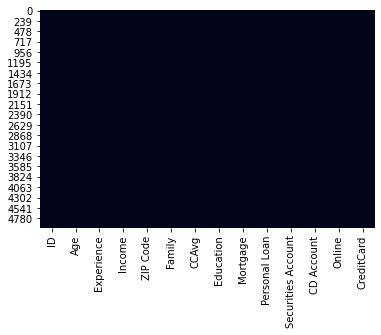

In [91]:
# Evaluate missing values

sns.heatmap(df.isnull(), cbar=False)

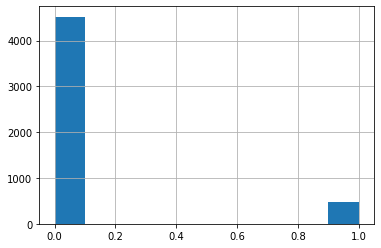

In [92]:
# Assess target class distribution

df['Personal Loan'].hist()

In [93]:
# Proportion of customers accepted loan offer

df['Personal Loan'].mean()

0.096

In [94]:
# Data Preprocessing

df['Education'] = df['Education'].astype('category', copy=False)

In [95]:
df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

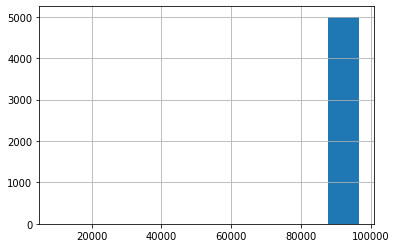

In [96]:
df['ZIP Code'].hist()

In [97]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [98]:
# Data Preprocessing - dummy coding categorical variables

df = pd.get_dummies(df, drop_first=True)

In [99]:
# Data Preprocessing - dropping variables with high cardinality

df = df.drop(['ID', 'ZIP Code'], axis=1)

In [100]:
# Verification of feature dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Education_2         5000 non-null   uint8  
 12  Education_3         5000 non-null   uint8  
dtypes: float64(1), int64(10), uint8(2)
memory usage: 439.6 KB


In [101]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [102]:
# Create dataframe from X & y for exploratory analysis

X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

df_clean = pd.concat([X, y], axis=1)

In [103]:
df_clean.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_2', 'Education_3', 'Personal Loan'],
      dtype='object')

In [104]:
X.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [105]:
y.mean()

0.096

In [106]:
# Individual feature correlation analysis relative target variable

df_clean.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education_3           0.090212
Education_2           0.071491
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64

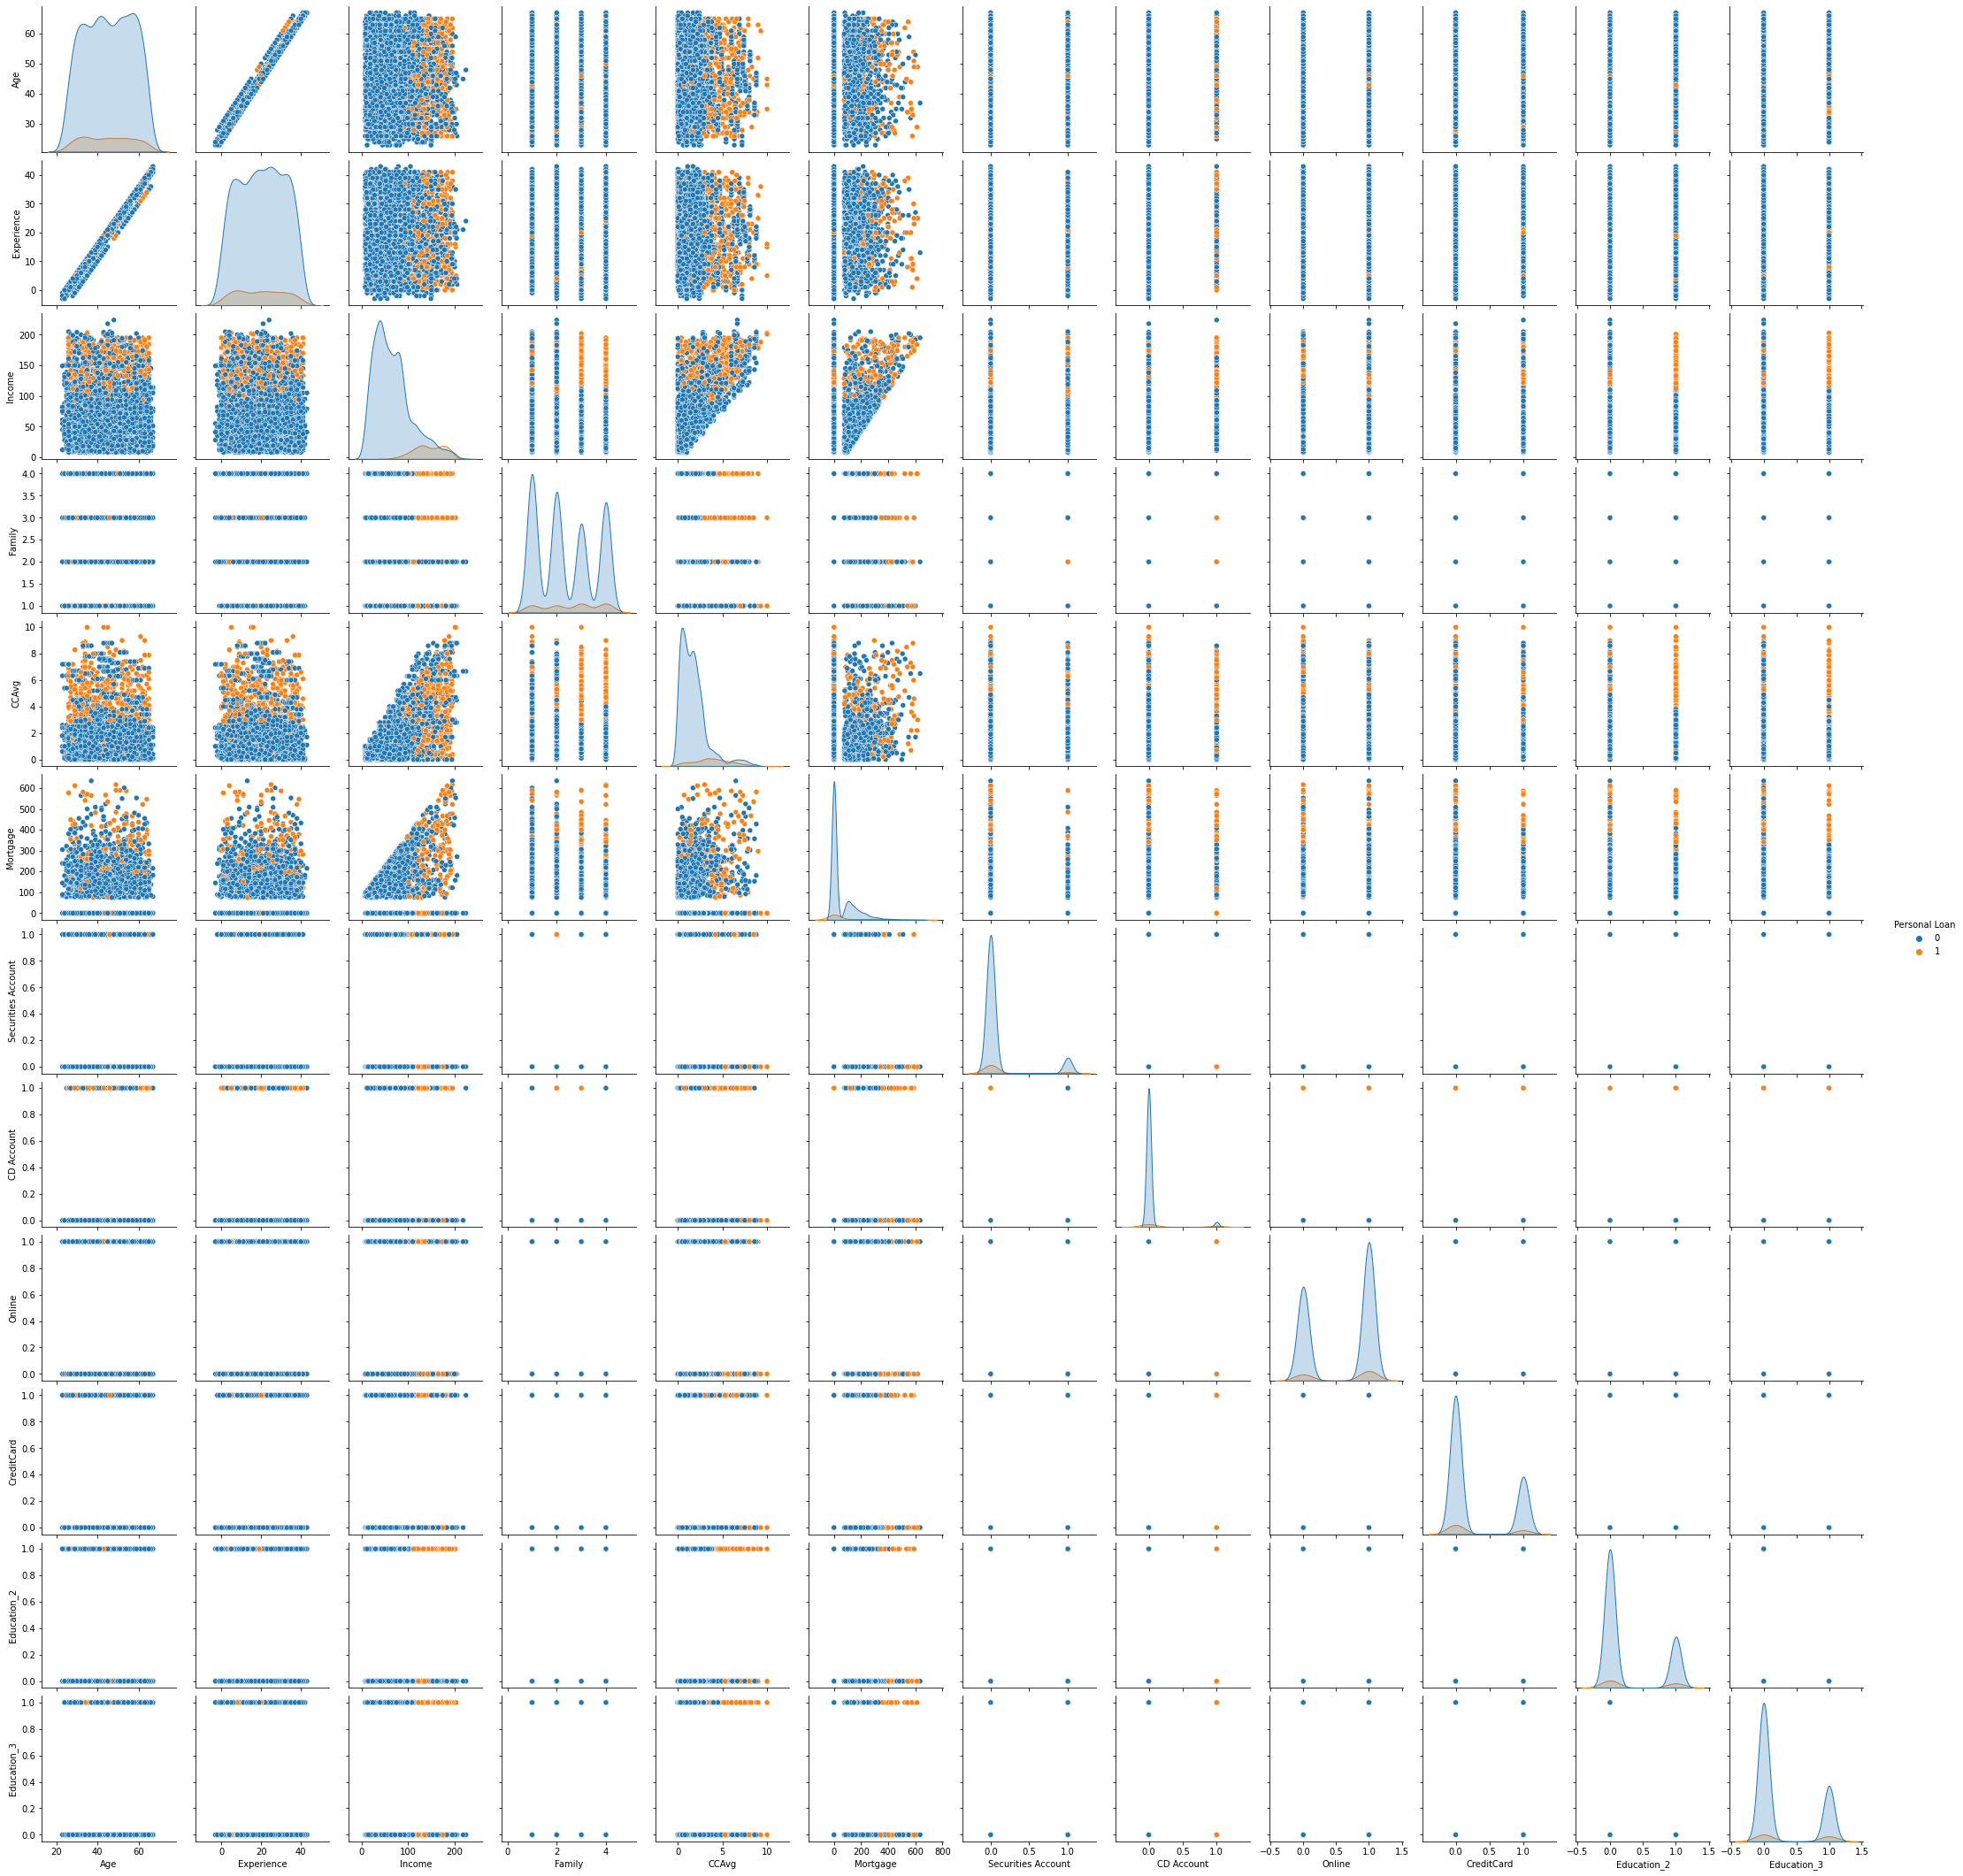

In [ ]:
# Individual feature pairplot analysis relative target variable

sns.pairplot(df_clean, hue='Personal Loan')

In [107]:
# Scaling new dataframe for model execution

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns = X.columns)

In [108]:
X_rescaled.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.465467,0.193794,0.088974,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200
std,0.260526,0.249303,0.213119,0.382554,0.174766,0.160179,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.000000,0.070000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.333333,0.150000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,0.727273,0.717391,0.416667,0.666667,0.250000,0.159055,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [109]:
# Split the data 70/30 into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [110]:
# Develop an ANN model with 20 nodes

MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='lbfgs', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

In [111]:
# ANN Model results

print('ANN Model Confusion Matrix')
print(confusion_matrix(y_test, y_pred_mlpc))
print('\n')
print('ANN Model Classification Report')
print(classification_report(y_test,y_pred_mlpc))
print('\n')
print('ANN Model ROC AUC:')
print(roc_auc_score(y_test,y_pred_mlpc))

ANN Model Confusion Matrix
[[1339   12]
 [  25  124]]


ANN Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.91      0.83      0.87       149

    accuracy                           0.98      1500
   macro avg       0.95      0.91      0.93      1500
weighted avg       0.97      0.98      0.97      1500



ANN Model ROC AUC:
0.9116662278501136


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

In [112]:
# Assess the effect of the number of hidden nodes (5-30) on model accuracy
# Identify optimal number of nodes

min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for n in range(min_hidden_layer_size, max_hidden_layer_size+1):
  MLPC_model = MLPClassifier(hidden_layer_sizes=n, activation='logistic', solver='lbfgs', random_state=1)
  scores = cross_val_score(MLPC_model, X_train, y_train.values.ravel(),cv = 5, scoring = "accuracy")
  cv_scores.append(scores.mean())

nodes= []
i = min_hidden_layer_size
for i in range (i, max_hidden_layer_size+1):
  nodes.append(i)
  i = i+1

nodes_amount = pd.DataFrame(nodes, columns=['nodes'])
nodes_amount['accuracy']= pd.DataFrame(cv_scores)
nodes_amount.sort_values(by='accuracy', ascending= False)

,nodes,accuracy
23,28,0.981143
24,29,0.979714
6,11,0.979714
8,13,0.979714
10,15,0.979714
4,9,0.979429
19,24,0.979143
22,27,0.978857
9,14,0.978571
21,26,0.978286


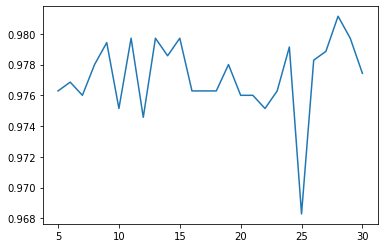

In [113]:
# Lineplot of optimal nodes distribution

sns.lineplot(x=range(min_hidden_layer_size, max_hidden_layer_size+1), y=cv_scores)

After observing nodes range 5-30, it is determined that 28 nodes is the optimal amount of nodes for this ANN model analysis, relative to accuracy, given this dataset. Below are the updated results.

In [114]:
# Develop an ANN model with optimal amount of nodes

MLPC_model = MLPClassifier(hidden_layer_sizes=28, activation='logistic', solver='lbfgs', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

In [115]:
# Optimal ANN Model results

print('Optimal ANN Model Confusion Matrix')
print(confusion_matrix(y_test, y_pred_mlpc))
print('\n')
print('Optimal ANN Model Classification Report')
print(classification_report(y_test,y_pred_mlpc))
print('\n')
print('Optimal ANN Model ROC AUC:')
print(roc_auc_score(y_test,y_pred_mlpc))

Optimal ANN Model Confusion Matrix
[[1336   15]
 [  20  129]]


Optimal ANN Model Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.90      0.87      0.88       149

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500



Optimal ANN Model ROC AUC:
0.9273344626649909
